<a href="https://colab.research.google.com/github/siddharthgangwar25/Severity-of-Accident-Prediction-Coursera_Capstone/blob/master/Accident_Severity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Severity of Accident Prediction**
####Prediction of the severity of future accidents that take place using vital features extracted from the dataset consisting of accidents in Seattle from 2004 to Present (Coursera Capstone)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#Importing Dataset
path = '/content/drive/My Drive/Colab Notebooks/Data-Collisions.csv'
Dataset = pd.read_csv(path)
Dataset.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

In [21]:
Dataset.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [22]:
#Converting Severity Code from (1/2) tp (0/1)
from sklearn import preprocessing
severity_code = Dataset['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)
Dataset["SEVERITYCODE"] = severity_code

In [23]:
#Encoding inattention (0 = No, 1 = Yes)
Dataset["INATTENTIONIND"].replace("Y", 1, inplace=True)
Dataset["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under influence (0 = No, 1 = Yes)
Dataset["UNDERINFL"].replace("N", int(0), inplace=True)
Dataset["UNDERINFL"].replace("Y", int(1), inplace=True)

#Encoding Speeding (0 = No, 1 = Yes)
Dataset["SPEEDING"].replace("Y", 1, inplace=True)
Dataset["SPEEDING"].replace(np.nan, int(0), inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
Dataset["ROADCOND"].replace("Dry", 0, inplace=True)
Dataset["ROADCOND"].replace("Wet", 2, inplace=True)
Dataset["ROADCOND"].replace("Ice", 2, inplace=True)
Dataset["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
Dataset["ROADCOND"].replace("Other", "Unknown", inplace=True)
Dataset["ROADCOND"].replace("Standing Water", 2, inplace=True)
Dataset["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
Dataset["ROADCOND"].replace("Oil", 2, inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
Dataset["WEATHER"].replace("Clear", 0, inplace=True)
Dataset["WEATHER"].replace("Raining", 3, inplace=True)
Dataset["WEATHER"].replace("Overcast", 1, inplace=True)
Dataset["WEATHER"].replace("Other", "Unknown", inplace=True)
Dataset["WEATHER"].replace("Snowing", 3, inplace=True)
Dataset["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
Dataset["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
Dataset["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
Dataset["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
Dataset["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
Dataset["LIGHTCOND"].replace("Daylight", 0, inplace=True)
Dataset["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
Dataset["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
Dataset["LIGHTCOND"].replace("Dusk", 1, inplace=True)
Dataset["LIGHTCOND"].replace("Dawn", 1, inplace=True)
Dataset["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
Dataset["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
Dataset["LIGHTCOND"].replace("Other","Unknown", inplace=True)

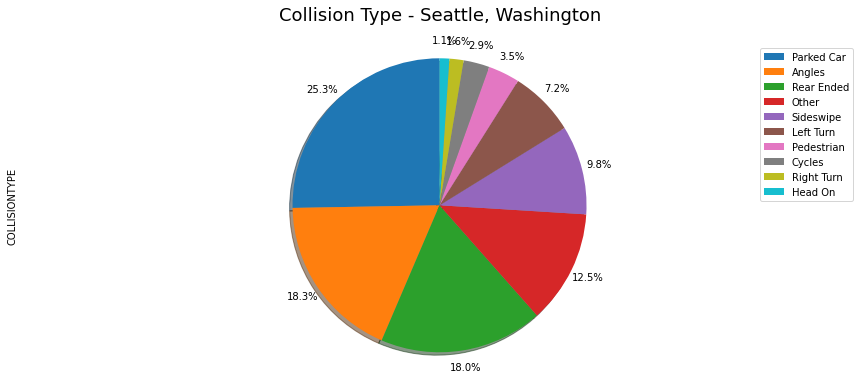

In [24]:
coltype=Dataset['COLLISIONTYPE'].value_counts()
coltype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12)

plt.title('Collision Type - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=coltype.index)

plt.show()

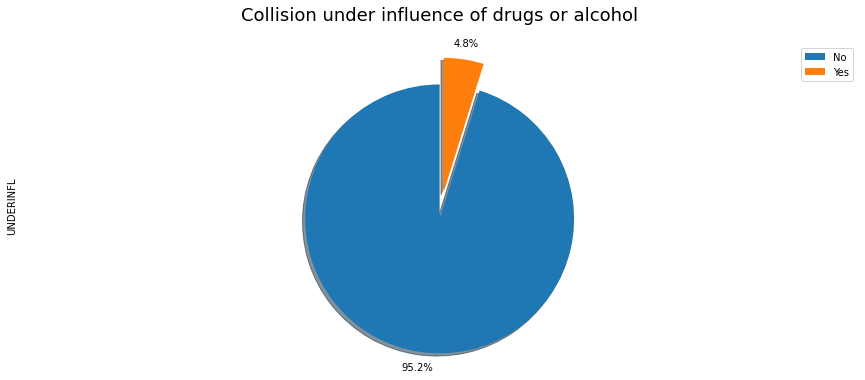

In [25]:
dff=Dataset[['UNDERINFL']]
dff=dff.dropna()
dff['UNDERINFL'] = dff['UNDERINFL'].astype(int)
dff['UNDERINFL'].value_counts()

INFL=dff['UNDERINFL'].value_counts()
INFL.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            explode=(0, 0.2))

plt.title('Collision under influence of drugs or alcohol', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=['No','Yes'])
plt.show()

In [26]:
#Feature Selection
df=Dataset[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
df

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,-122.323148,47.703140,1307,0.0,0,1,2,0,0.0,1
1,-122.347294,47.647172,52200,0.0,0,3,2,1,0.0,0
2,-122.334540,47.607871,26700,0.0,0,1,0,0,0.0,0
3,-122.334803,47.604803,1144,0.0,0,0,0,0,0.0,0
4,-122.306426,47.545739,17700,0.0,0,3,2,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,309534,0.0,0,0,0,0,0.0,1
194669,-122.344526,47.690924,309085,1.0,0,3,2,0,0.0,0
194670,-122.306689,47.683047,311280,0.0,0,0,0,0,0.0,1
194671,-122.355317,47.678734,309514,0.0,0,0,0,1,0.0,1


In [27]:
print(df.isnull().sum())  #Null Values

X                 5334
Y                 5334
INCKEY               0
INATTENTIONIND       0
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
SPEEDING             0
SEVERITYCODE         0
dtype: int64


In [28]:
df = df.dropna()  #Dropping the missing values.
df.count()

X                 184167
Y                 184167
INCKEY            184167
INATTENTIONIND    184167
UNDERINFL         184167
WEATHER           184167
ROADCOND          184167
LIGHTCOND         184167
SPEEDING          184167
SEVERITYCODE      184167
dtype: int64

In [29]:
print(df.isnull().sum()) #Current number of missing values

X                 0
Y                 0
INCKEY            0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
SEVERITYCODE      0
dtype: int64


In [30]:
#Fixing 'Others' value
feature_df=df.copy()

feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

np.count_nonzero(feature_df['UNDERINFL'])

    #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2
feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)


roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

 #Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

    #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

In [31]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184167 entries, 0 to 194672
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               184167 non-null  float64
 1   Y               184167 non-null  float64
 2   INCKEY          184167 non-null  int64  
 3   INATTENTIONIND  184167 non-null  int64  
 4   UNDERINFL       184167 non-null  int64  
 5   WEATHER         184167 non-null  int64  
 6   ROADCOND        184167 non-null  int64  
 7   LIGHTCOND       184167 non-null  int64  
 8   SPEEDING        184167 non-null  int64  
 9   SEVERITYCODE    184167 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 15.5 MB


In [32]:
#Machine Learning Set
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [33]:
#Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [ ]:
import folium
import webbrowser
from folium import plugins

#Make reduced df from feature_df to get a few random points to make map
limit = 100005
reduced_df = feature_df.iloc [0:limit:5, 0:]

#Folium Map
# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
seattle_map.save("seattlemap.html")
webbrowser.open("seattlemap.html")

In [35]:
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(X_train,y_train)

        #Make Prediction:
pred_DT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(pred_DT, y_test))

Accuracy score for Decision Tree =  0.6960055021628567


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[   34 16772]
 [   24 38421]]


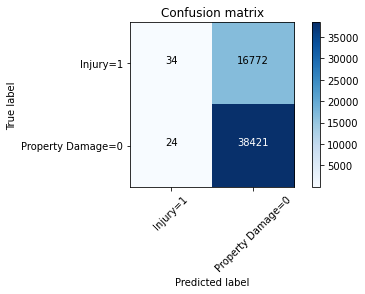

In [40]:
#Plot confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_DT, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print ("Accuracy", accuracy_score(yhatLR,y_test))

Accuracy 0.6956435177643844


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[    4 16802]
 [   14 38431]]


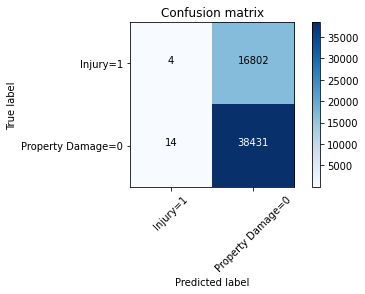

In [42]:
#Plot confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')